# **Chapter 3 구현을 위한 도구**

---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 3.3 넘파이는 머신러닝을 위한 데이터 처리의 핵심도구

In [ ]:
import numpy as np   # numpy의 별칭으로 np를 지정함
my_array = np.array( [ 1, 2, 3] )

my_array

array([1, 2, 3])

In [ ]:
a = np.array([1, 2, 3])       # 넘파이 ndarray 객체의 생성

# a 객체의 형태(shape), 차원, 요소의 자료형, 요소의 크기(byte), 요소의 수
a.shape, a.ndim, a.dtype, a.itemsize, a.size

((3,), 1, dtype('int64'), 8, 3)

### 3.4 넘파이 활용의 기본 - 브로드캐스팅, 인덱싱, 슬라이싱

In [ ]:
import numpy as np
sal = np.array([240, 260, 220, 255])

In [ ]:
sal = sal + 100   # 스칼라값 100은 [100, 100, 100, 100]으로 변환됨
print(sal)

[340 360 320 355]


In [ ]:
scores = np.array([58, 72, 93, 94, 89, 78, 99])
scores[3:]     # 인덱스를 생략하면 마지막 요소까지 슬라이싱

array([94, 89, 78, 99])

In [ ]:
scores[4:-1]   # 인덱스로 -1을 사용할 경우 78까지 슬라이싱

array([89, 78])

In [ ]:
np_array = np.array([[1,2,3],
                     [4,5,6],
                     [7,8,9]])  # 2차원 배열(넘파이 다차원 배열)
np_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
np_array[0, 2]

np.int64(3)

In [ ]:
np_array = np.array([[1, 2, 3, 4], [5, 6, 7, 8],
                     [9, 10, 11, 12], [13, 14, 15, 16]])
np_array[0:2, 2:4]

array([[3, 4],
       [7, 8]])

In [ ]:
np_array[0:2][2:4]

array([], shape=(0, 4), dtype=int64)

### 3.5 벡터화 연산 - 넘파이 배열 계산 성능의 핵심


In [ ]:
values = np.random.rand(100)
weights = np.random.rand(100)

In [ ]:
weighted_values = np.empty(len(values))  # 빈 행렬 생성
for i in range(len(values)):             # 명시적인 작업 지시 : C 스타일
    weighted_values[i] = weights[i] * values[i]

weighted_values[0::10]

array([0.19959597, 0.00865244, 0.0721305 , 0.05113365, 0.18396931,
       0.3763736 , 0.04019726, 0.5942225 , 0.02150635, 0.28801055])

In [ ]:
weighted_values = values * weights  # Numpy 스타일

weighted_values[0::10]

array([0.19959597, 0.00865244, 0.0721305 , 0.05113365, 0.18396931,
       0.3763736 , 0.04019726, 0.5942225 , 0.02150635, 0.28801055])

In [ ]:
def matmult_naive(a, b):
   c = np.zeros( (a.shape[0], b.shape[1]) , dtype = int)

   for i in range(a.shape[0]):
       for j in range(b.shape[0]):
           for k in range(a.shape[1]):
               c[i,j] += a[i,k] * b[k,j]
   return c

In [ ]:
def matmult2d(a, b):
   c = np.zeros( (a.shape[0], b.shape[1]) , dtype = int )
   for i in range(a.shape[0]):
       # a[i,:]는 b.T의 각 행에 브로드캐스팅 된다.
       c[i,:] = (a[i,:] * b.T).sum(axis=1)
   return c

In [ ]:
# 시간을 계산하기 위해 임포트
import time
import matplotlib.pyplot as plt

# 테스트 크기
sizes = [50, 100, 200, 300, 400, 500]

times_naive, times_vec, times_np    = [], [], []

for n in sizes:
    a = np.random.randint(1, 100, (n, n))
    b = np.random.randint(1, 100, (n, n))

    t1 = time.time(); matmult_naive(a, b); t_naive = time.time() - t1
    t1 = time.time(); matmult2d(a, b);     t_vec   = time.time() - t1
    t1 = time.time(); a @ b;               t_np    = time.time() - t1

    times_naive.append(t_naive)
    times_vec.append(t_vec)
    times_np.append(t_np)

    print(f"n={n:3d} naive {t_naive:.3f}s | vec {t_vec:.3f}s | \
            np {t_np:.4f}s")


n= 50 naive 0.090s | vec 0.001s |             np 0.0001s
n=100 naive 0.670s | vec 0.003s |             np 0.0011s
n=200 naive 5.457s | vec 0.015s |             np 0.0080s
n=300 naive 21.080s | vec 0.053s |             np 0.0278s
n=400 naive 53.028s | vec 0.129s |             np 0.0901s
n=500 naive 97.116s | vec 0.249s |             np 0.1724s


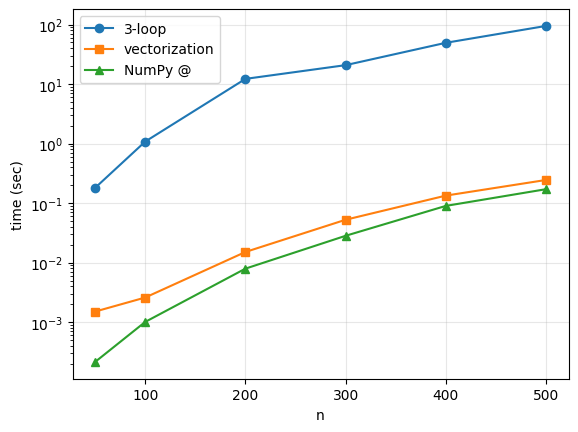

In [ ]:
# 그래프
plt.plot(sizes, times_naive, 'o-', label='3-loop')
plt.plot(sizes, times_vec,   's-', label='vectorization')
plt.plot(sizes, times_np,    '^-', label='NumPy @')
plt.yscale('log'); plt.xlabel('n'); plt.ylabel('time (sec)')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()

### 3.6 논리 인덱싱으로 빠르게 데이터 추려내기

In [ ]:
ages = np.array([18, 19, 25, 30, 28])
y = ages > 20
y

array([False, False,  True,  True,  True])

In [ ]:
ages[ ages > 20 ]

array([25, 30, 28])

In [ ]:
np_array = np.array([[1,2,3], [4,5,6], [7,8,9]])
np_array > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [ ]:
np_array[ np_array > 5 ]

array([6, 7, 8, 9])

In [ ]:
np_array % 2 == 0  # 원소가 2로 나누어 0인가 검사하여 참/거짓 반환

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

In [ ]:
np_array[ np_array % 2 == 0 ]

array([2, 4, 6, 8])

### 3.7 판다스 소개

In [ ]:
import numpy as np
import pandas as pd
series = pd.Series([1, 3, np.nan, 4])   # np.nan은 결측값
series

,0
0,1.0
1,3.0
2,NaN
3,4.0


In [ ]:
name_series = pd.Series(['김수안', '김수정', '박동윤',
                         '강이안', '강지안', '박동민'])
age_series = pd.Series([19, 23, 22, 19, 16, 25])
school_series = pd.Series(['고교', '대학', '대학',
                           '고교', '중학교', '대학원'])
grade_series = pd.Series([4.35, 4.23, 4.25, 4.37, 4.25, 4.5])
print(name_series, age_series, school_series, grade_series)

0    김수안
1    김수정
2    박동윤
3    강이안
4    강지안
5    박동민
dtype: object 0    19
1    23
2    22
3    19
4    16
5    25
dtype: int64 0     고교
1     대학
2     대학
3     고교
4    중학교
5    대학원
dtype: object 0    4.35
1    4.23
2    4.25
3    4.37
4    4.25
5    4.50
dtype: float64


In [ ]:
df = pd.DataFrame({'이름': name_series, '나이': age_series,
                   '학교': school_series, '평점': grade_series})
print(df)

    이름  나이   학교    평점
0  김수안  19   고교  4.35
1  김수정  23   대학  4.23
2  박동윤  22   대학  4.25
3  강이안  19   고교  4.37
4  강지안  16  중학교  4.25
5  박동민  25  대학원  4.50


### 3.8 판다스로 데이터 읽고 확인하기

In [ ]:
import pandas as pd
path = 'https://github.com/dknife/ML2nd/raw/main/data/'
file = path+'vehicle_prod.csv'
df = pd.read_csv(file)

In [ ]:
print(df)

  Unnamed: 0   2007   2008   2009   2010   2011
0      China   7.71   7.95  11.96  15.84  16.33
1         EU  19.02  17.71  15.00  16.70  17.48
2         US  10.47   8.45   5.58   7.60   8.40
3      Japan  10.87  10.83   7.55   9.09   7.88
4      Korea   4.04   3.78   3.45   4.20   4.62
5     Mexico   2.01   2.05   1.50   2.25   2.54


In [ ]:
df = pd.read_csv(file, index_col = 0)
print(df)

         2007   2008   2009   2010   2011
China    7.71   7.95  11.96  15.84  16.33
EU      19.02  17.71  15.00  16.70  17.48
US      10.47   8.45   5.58   7.60   8.40
Japan   10.87  10.83   7.55   9.09   7.88
Korea    4.04   3.78   3.45   4.20   4.62
Mexico   2.01   2.05   1.50   2.25   2.54


### 3.9 데이터 시리즈 선택하여 시각화해 보기

In [ ]:
df_my_index = pd.read_csv(file, index_col = 0)
df_no_index = pd.read_csv(file)
print(df_my_index['2007'])
print(df_no_index['2007'])

China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64
0     7.71
1    19.02
2    10.47
3    10.87
4     4.04
5     2.01
Name: 2007, dtype: float64


In [ ]:
print(df[['2007', '2008', '2009']])

         2007   2008   2009
China    7.71   7.95  11.96
EU      19.02  17.71  15.00
US      10.47   8.45   5.58
Japan   10.87  10.83   7.55
Korea    4.04   3.78   3.45
Mexico   2.01   2.05   1.50


<Axes: >

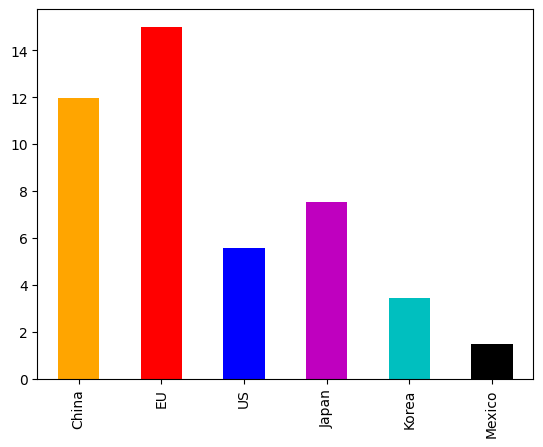

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['2009'].plot(kind='bar', color=('orange','r', 'b', 'm', 'c', 'k'))

<Axes: ylabel='2009'>

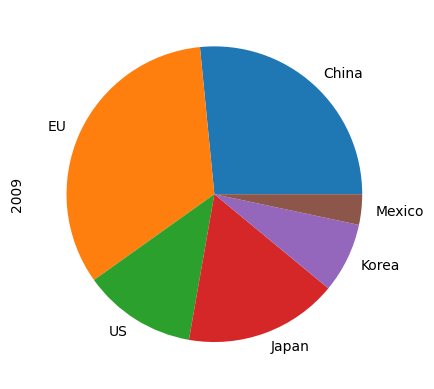

In [ ]:
df['2009'].plot(kind='pie')

### 3.10 편리한 데이터 다루기 - 슬라이싱과 열 데이터 추가

In [ ]:
df.head(3)

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40


In [ ]:
df[2:6]

,2007,2008,2009,2010,2011
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
df.loc['Korea']

,Korea
2007,4.04
2008,3.78
2009,3.45
2010,4.20
2011,4.62


In [ ]:
df['2011'][[0, 4]]

/tmp/ipython-input-2494770783.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['2011'][[0, 4]]


,2011
China,16.33
Korea,4.62


In [ ]:
df.loc['Korea', '2011']

np.float64(4.62)

In [ ]:
df['total'] = df.sum(axis = 1)
print(df)

         2007   2008   2009   2010   2011  total
China    7.71   7.95  11.96  15.84  16.33  59.79
EU      19.02  17.71  15.00  16.70  17.48  85.91
US      10.47   8.45   5.58   7.60   8.40  40.50
Japan   10.87  10.83   7.55   9.09   7.88  46.22
Korea    4.04   3.78   3.45   4.20   4.62  20.09
Mexico   2.01   2.05   1.50   2.25   2.54  10.35


###  3.11 판다스를 이용한 데이터 분석

In [ ]:
import pandas as pd

path = 'https://github.com/dknife/ML2nd/raw/main/data/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, index_col = 0, encoding='CP949')
print(weather.head(3))
print('weather 데이터의 shape :', weather.shape)

            평균기온  최대풍속  평균풍속
일시                          
2010-08-01  28.7   8.3   3.4
2010-08-02  25.2   8.7   3.8
2010-08-03  22.1   6.3   2.9
weather 데이터의 shape : (3653, 3)


In [ ]:
print(weather.describe())

              평균기온         최대풍속         평균풍속
count  3653.000000  3649.000000  3647.000000
mean     12.942102     7.911099     3.936441
std       8.538507     3.029862     1.888473
min      -9.000000     2.000000     0.200000
25%       5.400000     5.700000     2.500000
50%      13.800000     7.600000     3.600000
75%      20.100000     9.700000     5.000000
max      31.300000    26.000000    14.900000


In [ ]:
print('평균 분석 -----------------------------')
print(weather.mean())
print('표준편차  분석 -----------------------------')
print(weather.std())

평균 분석 -----------------------------
평균기온    12.942102
최대풍속     7.911099
평균풍속     3.936441
dtype: float64
표준편차  분석 -----------------------------
평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
dtype: float64


In [ ]:
weather[['최대풍속','평균풍속']].max()

,0
최대풍속,26.0
평균풍속,14.9


### 3.12 데이터 정제와 결손값의 처리


In [ ]:
weather.count()

,0
평균기온,3653
최대풍속,3649
평균풍속,3647


In [ ]:
missing_data = weather[ weather['평균풍속'].isna() ]
print(missing_data)

            평균기온  최대풍속  평균풍속
일시                          
2012-02-11  -0.7   NaN   NaN
2012-02-12   0.4   NaN   NaN
2012-02-13   4.0   NaN   NaN
2015-03-22  10.1  11.6   NaN
2015-04-01   7.3  12.1   NaN
2019-04-18  15.7  11.7   NaN


In [ ]:
# 결손값을 0으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(0, inplace = True)
print(weather.loc['2012-02-11'])

평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64


In [ ]:
weather.fillna( weather['평균풍속'].mean(), inplace = True)
print(weather.loc['2012-02-11'])

평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64


### 3.13 그룹핑과 필터링

In [ ]:
path = 'https://github.com/dknife/ML2nd/raw/main/data/'
weather_file = path + 'weather.csv'
weather.fillna( weather['평균풍속'].mean(), inplace = True)
weather = pd.read_csv(weather_file, encoding='CP949')


In [ ]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month

means = weather.groupby('month').mean(numeric_only=True)
print(means)

            평균기온      최대풍속      평균풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
3       6.250323  8.871935  4.390291
4      11.064667  9.305017  4.622483
5      16.564194  8.548710  4.219355
6      19.616667  6.945667  3.461000
7      23.328387  7.322581  3.877419
8      24.748710  6.853226  3.596129
9      20.323667  6.896333  3.661667
10     15.383871  7.766774  3.961613
11      9.889667  8.013333  3.930667
12      3.753548  8.045484  3.817097


In [ ]:
means['평균풍속'] >= 4.0

,평균풍속
month,
1,False
2,False
3,True
4,True
5,True
6,False
7,False
8,False
9,False


In [ ]:
means[ means['평균풍속'] >= 4.0 ]

,평균기온,최대풍속,평균풍속
month,,,
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355


### 3.14 데이터 구조의 변경: pivot과 concat

In [ ]:
import pandas as pd
df_1 = pd.DataFrame({'item' : ['ring0', 'ring0', 'ring1', 'ring1'],
                     'type' : ['Gold', 'Silver', 'Gold', 'Bronze'],
                     'price': [20000, 10000, 50000, 30000]})
df_1

,item,type,price
0,ring0,Gold,20000
1,ring0,Silver,10000
2,ring1,Gold,50000
3,ring1,Bronze,30000


In [ ]:
df_2 = df_1.pivot(index='item', columns='type', values='price')
print(df_2)

type    Bronze     Gold   Silver
item                            
ring0      NaN  20000.0  10000.0
ring1  30000.0  50000.0      NaN


In [ ]:
df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'],
                      'B' : ['b10', 'b11', 'b12'],
                      'C' : ['c10', 'c11', 'c12']} ,
                      index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
                      'C' : ['c23', 'c24', 'c25'],
                      'D' : ['d23', 'd24', 'd25']} ,
                      index = ['다', '라',  '마'] )

In [ ]:
df_3 = pd.concat( [df_1, df_2])
print(df_3)

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25


### 3.15 데이터의 병합: merge

In [ ]:
print('left outer \n' , df_1.merge(df_2, how='left', on='B' ) )
print('right outer \n' ,df_1.merge(df_2, how='right', on='B' ) )
print('full outer \n' ,df_1.merge(df_2, how='outer', on='B' ) )
print('inner \n' ,df_1.merge(df_2, how='inner', on='B' ) )

left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


In [ ]:
df_3 = df_1.merge(df_2, how='outer', on='B')
print(df_3)

     A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25


In [ ]:
df_3 = df_1.merge(df_2, how = 'outer',
                  left_index = True, right_index = True )
print(df_3)

     A  B_x  C_x  B_y  C_y    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25
